# Bubble sort

Write a function which sorts an input list using a bubble sort technique (ascending order).

EXAMPLE: <br>
Input list [4,3,1,2] <br>
Steps of the bubble sort algorithm:

1) first iteration <br>
1.1) set i = 0 and j = 0 <br>
1.2) look at i-th and (i+1)-th elements  (4 and 3) <br>
1.3) if the first element is greater than second one - swap the elements ([3,4,1,2]) <br>
1.4) increase i (i=1) (repeat until i = size of the input list - 1 - j) <br>
1.5) look at i-th and (i+1)-th elements  (4 and 1) <br>
1.6) swap ([3,1,4,2]) <br>
1.7) increase i (i=2) <br>
1.7) look at i-th and (i+1)-th elements  (4 and 2) <br>
1.8) swap ([3,1,2,4]) <br>

2) Now, we have finished the first iteration (outer loop). We know that the last element is the greatest one so in next iteration we do not need to iterate over this element.
2.1) increase j = 1, and set i = 0 <br>
2.2) look at i-th and (i+1)-th elements  (3 and 1) <br>
2.3) swap ([1,3,2,4]) <br> 
2.4) increase i (i=1) <br>
2.5) look at i-th and (i+1)-th elements  (3 and 2) <br>
2.6) swap ([1,2,3,4]) <br>

3) Now, the second greatest element is at (n-1)-th position. Proceed: <br>
3.1) increase j = 2, and set i = 0 <br>
3.2) look at i-th and (i+1)-th elements  (1 and 2) <br>
3.3) there is no need to swap element so do nothing <br>

4) end <br>

In [1]:
def bubbleSort(elem_list):
    for i in range(len(elem_list)):
        for j in range(i, len(elem_list)):
            if elem_list[i] > elem_list[j]:
                elem_list[i], elem_list[j] = elem_list[j], elem_list[i]
    return elem_list

In [2]:
l = [5,3,2,4,1]

In [3]:
# verify the correctness of your implementation
l_copy = l.copy()
l.sort()
print(l)
l_copy = bubbleSort(l_copy)
print(l_copy)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [4]:
l = [2, 3, 4, 3, 9, 5, 3, 6, 5, 7, 4, 0]

In [5]:
l_copy = l.copy()
l.sort()
print(l)
l_copy = bubbleSort(l_copy)
print(l_copy)

[0, 2, 3, 3, 3, 4, 4, 5, 5, 6, 7, 9]
[0, 2, 3, 3, 3, 4, 4, 5, 5, 6, 7, 9]


# Binary search

In [6]:
import numpy as np

Write a function which verifies is a list contains some element, using binary search.<br>

Binary search:<br>

check if 8 is in array [1,2,3,4,5,6,7,8,9,10,11]<br>

1) sort array if it is not sorted <br>

2) take a middle element of an array: 6 (if the array is an even length, we can select bigger or smaller value arbitrarily)<br>
2.1) check if 6 is greater than 8 or not<br>
2.2) 6 is smaller so we take a second half of the array, i.e., [7,8,9,10,11] and run a binary search again for this sub-array <br>

3) take a middle element of the array [7,8,9,10,11]: 9 <br>
3.1) check if 9 is greater than 8 or not <br>
3.2) 9 is greater so we take a second half of the array, i.e., [7,8,9] and run the binary search again for this sub-array

4) take a middle point of the array [7,8,9]: 8
- check if 8 is greater than 8 or not (however, 8=8, so we can stop and return "true")
- 8 is not greater so we take a first half of the array, i.e., [7,8] and run the binary search again for this sub-array

5) take a middle point of the array [7,8]: 8
- check if 8 is greater from 8 or not
- 8 is not greater so we take a second half of array, i.e., [8], and run the binary search again for this sub-array

6) The array contains only one element so we check if it equals 8. 8 = 8, so we return true

In [7]:
arr = np.array([1,2,3,4,5,6,7,8,9,10])

In [12]:
def binarySearch(arr,value):
    arr = bubbleSort(arr)
    low = 0
    high = len(arr) - 1

    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == value:
            return mid  # target found at index mid
        elif arr[mid] < value:
            low = mid + 1
        else:
            high = mid - 1
    return -1

In [14]:
print(8 in arr)
print(binarySearch(arr,8))

True
7


# Random walk

Below, you can find a random walk algorithm (a drunk person who is walking around the map).<br>
Analyze the code and the method. Then, do the following tasks:<br>

1) Implement a "drunk horse walker" which moves like a knight in chess. To distinguish between the two walkers, update a red component every time the knight stops in some location.<br>

2) Implement your own walker (think his walking policy up)<br>

3) Report a maximal value of red and green color. Which one is bigger? Why?<br>

4) Display a barplot illustrating how many times each move was performed<br>

In [17]:
import matplotlib.pyplot as plt
import random
from collections import Counter

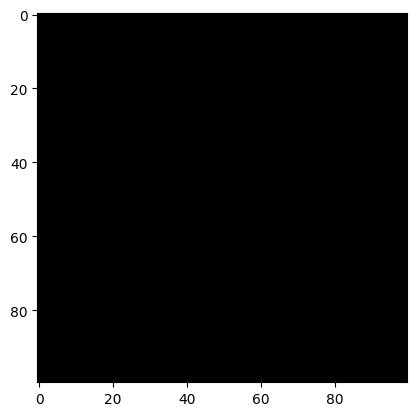

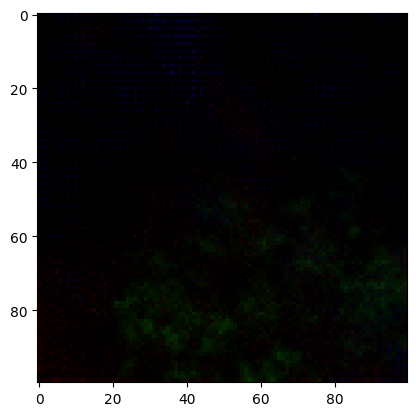

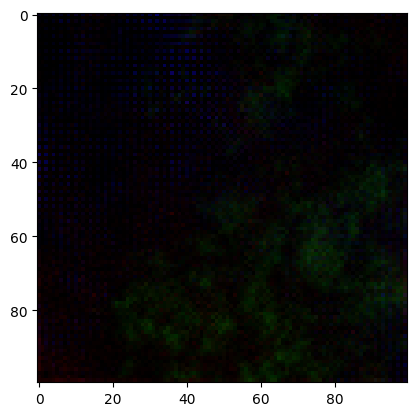

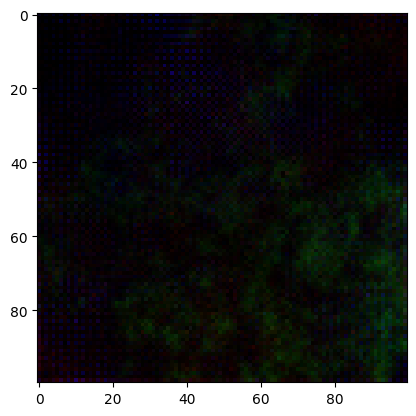

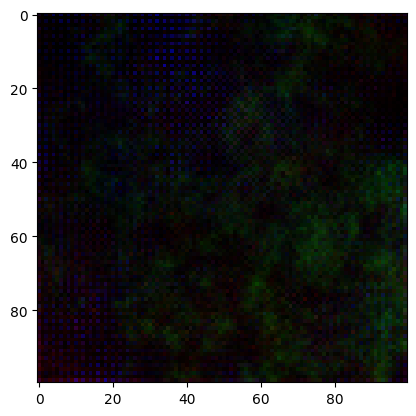

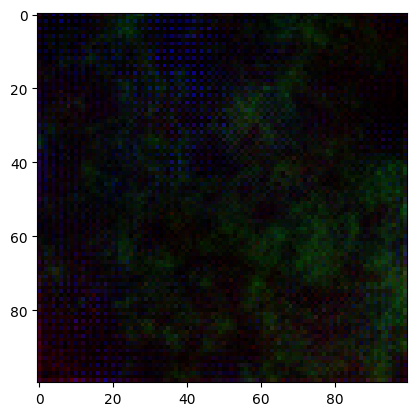

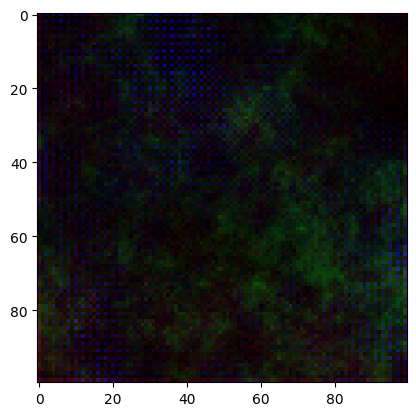

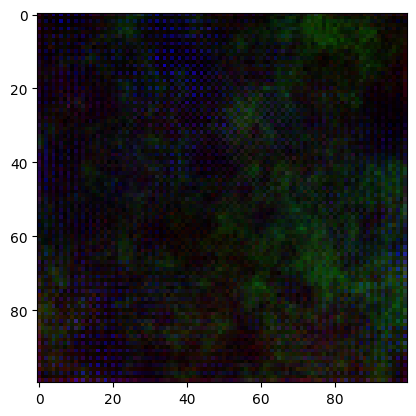

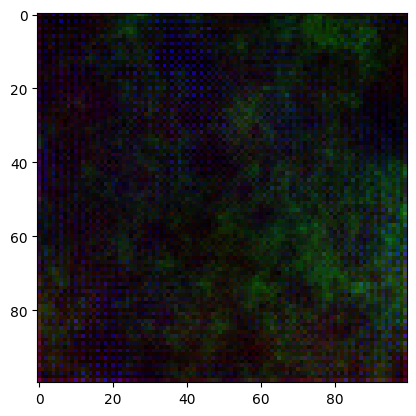

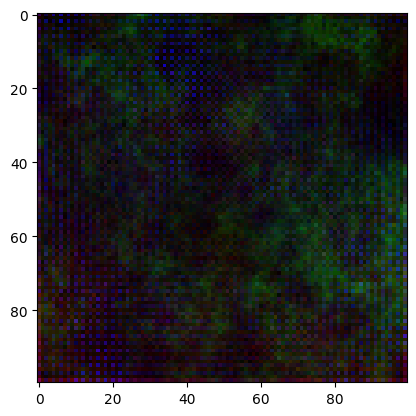

Max green (drunk walker): 0.46
Max red (horse walker): 0.53
Horse walker visited some cells more intensely.


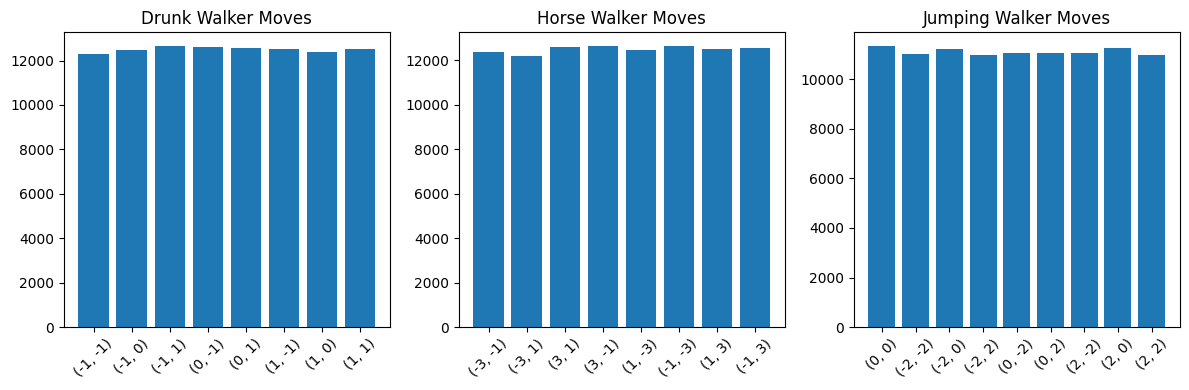

In [ ]:
size = 100
steps = 100000

### GENERATE SOME EMPTY MAP
some_map = np.zeros((size,size,3)) # width x height x RBG colors

### POSSIBLE MOVES
moves = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
moves_horse = [(-3, -1), (-3, 1), (3, 1), (3, -1), (1, -3), (-1, -3), (1, 3), (-1, 3)]
moves_jump = [(0, 0)] + [(2 * m[0], 2 * m[1]) for m in moves] ### added


### INITIAL POSITION OF A "DRUNK WALKER"
position = (size//2,size//2)
horse_position = (size//2,size//2)
jumper_position = (size // 2, size // 2) ###

# Move counters for the bar plot
move_counter = Counter()
horse_counter = Counter()
jump_counter = Counter()

### PERFORM MANY MOVES
for i in range(steps):
    move = random.choice(moves)
    position = (min(max(position[0] + move[0],0), size-1),
                min(max(position[1] + move[1],0), size-1))
    some_map[position[0],position[1], 1]+=0.01 ### UPDATE "G" COMPONTENT = MAKE A CELL MORE GREEN
    move_counter[moves.index(move)] += 1  # Track move frequency

    move = random.choice(moves_horse)
    horse_position = (min(max(horse_position[0] + move[0],0), size-1),
                min(max(horse_position[1] + move[1],0), size-1))
    some_map[horse_position[0],horse_position[1], 0]+=0.01 ### UPDATE "R" COMPONTENT = MAKE A CELL MORE RED
    horse_counter[moves_horse.index(move)] += 1  # Track horse move frequency ###

    move = random.choice(moves_jump)
    jumper_position = (min(max(jumper_position[0] + move[0], 0), size - 1),
                       min(max(jumper_position[1] + move[1], 0), size - 1))
    some_map[jumper_position[0], jumper_position[1], 2] += 0.01  # Update BLUE component
    jump_counter[moves_jump.index(move)] += 1  # Track jumper move frequency
  
    ### DISPLAY THE MAP
    if i%(steps//10) == 0:  
        some_map = some_map.clip(0,1)    
        plt.imshow(some_map)
        plt.show()

# After the loop, display maximal values of red and green
max_green = some_map[:, :, 1].max()
max_red = some_map[:, :, 0].max()

print(f"Max green (drunk walker): {max_green:.2f}")
print(f"Max red (horse walker): {max_red:.2f}")

if max_red > max_green:
    print("Horse walker visited some cells more intensely.")
else:
    print("Drunk walker visited some cells more intensely.")

# Display bar plot of move frequencies
plt.figure(figsize=(12, 4))

# Drunk walker moves
plt.subplot(1, 3, 1)
plt.bar(range(len(moves)), [move_counter[i] for i in range(len(moves))])
plt.title("Drunk Walker Moves")
plt.xticks(range(len(moves)), [str(m) for m in moves], rotation=45)

# Horse walker moves
plt.subplot(1, 3, 2)
plt.bar(range(len(moves_horse)), [horse_counter[i] for i in range(len(moves_horse))])
plt.title("Horse Walker Moves")
plt.xticks(range(len(moves_horse)), [str(m) for m in moves_horse], rotation=45)

# Jumper walker moves
plt.subplot(1, 3, 3)
plt.bar(range(len(moves_jump)), [jump_counter[i] for i in range(len(moves_jump))])
plt.title("Jumping Walker Moves")
plt.xticks(range(len(moves_jump)), [str(m) for m in moves_jump], rotation=45)

plt.tight_layout()
plt.show()